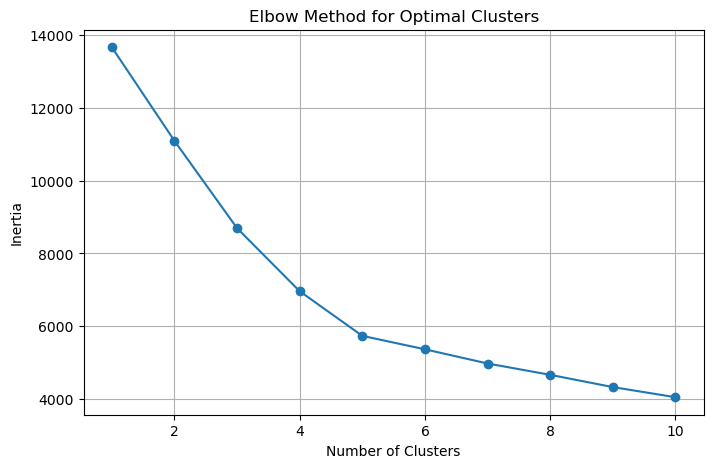

,Cluster,Unnamed: 0,confident,bmi,children
0,0,1,10,39.055556,0
1,0,2,10,28.120000,0
2,0,3,10,21.110596,0
3,0,4,8,22.671325,0
4,0,5,8,25.821855,1


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'DentalVisit-Clean.csv'
data = pd.read_csv(file_path)

# Selecting numerical columns for clustering
numerical_data = data.select_dtypes(include=['float64', 'int64']).dropna()

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Determining the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Applying KMeans with an optimal number of clusters (e.g., 3 based on the elbow graph)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Displaying the first few rows with cluster labels
data[['Cluster'] + numerical_data.columns.tolist()].head()


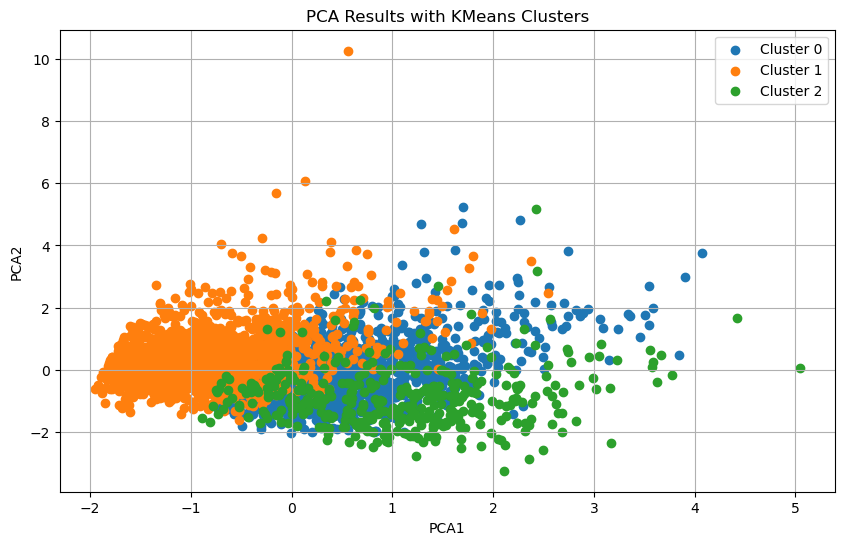

array([0.26167575, 0.25482036])

In [5]:
from sklearn.decomposition import PCA

# Applying PCA to the scaled data
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)

# Adding PCA results back to the dataframe for visualization
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Visualizing the PCA results with cluster labels
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
    
plt.title('PCA Results with KMeans Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

# Explained variance ratio to understand PCA contribution
pca.explained_variance_ratio_
